# Homework 3
#### CS 273P Machine Learning and Data Mining (Winter 2025)

* Q1: Common PyTorch Operations (20 points)
* Q2: Linear Modeling on Titanic Dataset (75 points)
* Statement of Collaboration (5 points)

## Submission guidelines
Once you have completed the assignment in this notebook, you should export a PDF from this notebook and submit it to Gradescope. You do not need to submit anything else. Make sure your PDF contains your code, the output of each cell, and your results are not blocked or clipped significantly. Once your PDF is uploaded to Gradescope, you will be prompted to match each question with the pages in your PDF, please make sure you complete this step and do it correctly. Since this is the second assignment, and we have made our submission guidelines clear, we will not accept any submission that does not follow the guidelines.

## Question 1: Common PyTorch Operations
You have used PyTorch in your last assignment. In this question, let's get to know PyTorch better by performing some common operations. In practice, you will be using these operations frequently.

For now, import PyTorch first. If you don't have it installed, you can install it by running `!pip install torch` in a code cell.

In addition, you may find their documentation to learn more: https://pytorch.org/docs/stable/index.html

In [1]:
import torch
import numpy as np

### Question 1.1: Tensor Operations (5 points)
In this question, we will look at some common code snippets you will encounter when working with PyTorch tensors.

In [2]:
# Create a 2D tensor
A = torch.tensor([[1, 2], [3, 4]])
# Create an all-ones tensor with the same shape as A
B = torch.ones_like(A)
# Create an all-zeros tensor with the same shape as A
C = torch.zeros_like(A)


##### Your code starts here #####

# Print out the shape of tensor A
print("Shape of tensor A:", A.shape)
print("\n")
# Print out the result of multiplying tensor A with tensor B
print("Tensor A * Tensor B:", A * B)
print("\n")
# Concatenate B and C along dimension 0 and print out the shape of the result
print("Shape of resulting concatenated tensor:", torch.cat((B, C), dim=0).shape)
print("\n")
# Reshape A into a 1D tensor and print out A
print("Reshaped A:", A.reshape(-1))
print("\n")
# Create a random tensor of shape (3, 3) with values from 0 to 1 and print out the tensor
print("Random tensor:", torch.rand(3, 3))
print("\n")

Shape of tensor A: torch.Size([2, 2])


Tensor A * Tensor B: tensor([[1, 2],
        [3, 4]])


Shape of resulting concatenated tensor: torch.Size([4, 2])


Reshaped A: tensor([1, 2, 3, 4])


Random tensor: tensor([[0.6505, 0.8118, 0.7979],
        [0.1916, 0.3523, 0.6782],
        [0.2753, 0.1566, 0.2115]])




### Question 1.2: Autograd (5 points)
Autograd is a feature offered by PyTorch that automatically computes gradients for tensors, this facilitates the updating of model parameters during training. In this question, you will work with autograd to compute gradients for a tensor.

In [3]:
# Define a simple function
def f(x):
    return x[0] + x[1] * x[1]


##### Your code starts here #####

# Create a 2-element 1D tensor `param` with automatic differentiation enabled
# hint: use argument `requires_grad`
param = torch.tensor([0.5, 3.0], requires_grad=True)
# Calculate the gradient of f with respect to `param`
# hint: use `torch.autograd.grad` function
gradient = torch.autograd.grad(outputs=f(param), inputs=param)
gradient = gradient[0]
# Print out the gradient
print(gradient)

tensor([1., 6.])


### Question 1.3: The Neural Network Module (5 points)
`torch.nn` provides a simple way to define neural network architectures. In this question, you will use `torch.nn` to define a simple linear model.

In [4]:
##### Your code starts here #####

# Create a Linear model using torch.nn.Linear, with input size 4 and output size 1
linear_model = torch.nn.Linear(in_features=4, out_features=1)
# Create 1D input tensor of size 4
one_dim_input_tensor = torch.randn(4)
# Print out the output of the model given the input tensor
output_tensor = linear_model(one_dim_input_tensor)
print(output_tensor)

tensor([0.5418], grad_fn=<ViewBackward0>)


### Question 1.4: Computing Devices (5 points)
PyTorch allows you to run your code on different devices, such as CPUs and GPUs. In this question, we will be checking for a CUDA device (NVIDIA GPU) and move data to and from it if available (don't worry if you don't have a CUDA-compatible GPU).

In [5]:
cuda_available = torch.cuda.is_available()  # Check if a CUDA GPU is available

##### Your code starts here #####

# Define the device to be used
device = torch.device("cuda" if cuda_available else "cpu")
# Create a 4x4 tensor and move it to the device
tensor = torch.randn(4, 4).to(device)
# Print out the tensor's device
print("Tensor's device:", tensor.device)
# Move it back to the CPU device
tensor_cpu = tensor.to("cpu")

Tensor's device: cpu


## Question 2: Linear Modeling on Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this question, we ask you to build a linear model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![titanic.png](attachment:titanic.png)

Why did Rose survive and Jack didn't? Let's find out!

![titanic-meme.png](attachment:titanic-meme.png)

In [6]:
from google.colab import files

# Upload file from local system
uploaded = files.upload()

!unzip -q data.zip

Saving data.zip to data.zip


### Question 2.1: Data Preprocessing (25 points)
Real world data is often messy and requires preprocessing before it can be used for modeling. This procedure is ubiquitous in real-world applications and is often referred to as "data cleaning" and "feature engineering". In this question, you will preprocess the Titanic dataset. The dataset can be found in the data folder.

In this question, we will be using Pandas, a powerful tool for tabular data manipulation. If you don't have it installed, you can install it by running `!pip install pandas` in a code cell.

Before we start, let's load the dataset and take a look at the first few rows.


In [320]:
import pandas as pd

# Load the titanic dataset
path = "data/titanic/train.csv"
data = pd.read_csv(path)

# Print out the column names
print(data.columns)

# Print out the shape of the dataset
print(data.shape)

# Print out the first 5 rows of the dataset
print(data.head(5))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C 

Here's some information about the columns in the dataset:
* PassengerId: Unique identifier for each passenger (index, not predictive).
* Survived: Target variable (0 = did not survive, 1 = survived).
* Pclass: Travel class (1 = upper, 2 = middle, 3 = lower).
* Name: Full name, may contain titles indicating social status.
* Sex: Gender of the passenger (male/female).
* Age: Passenger's age in years (missing values exist).
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Ticket: Ticket number (possible grouping or class info).
* Fare: Ticket fare paid (proxy for socio-economic status).
* Cabin: Cabin number (location on ship, many missing values).
* Embarked: Port of boarding (C = Cherbourg, Q = Queenstown, S = Southampton).

Based on your intuition, do you think all of the columns are useful for predicting survival? If not, which columns can be dropped? (Answer in the markdown cell below)


I do not think that all of the columns are useful for predicting survival. PassengerID (its just an index and not predictive), Name (does not have a meaningful impact on survival), Ticket (ticket numbering was probably random), and Cabin (too much of the data is missing for it to be useful) can all be dropped.

Building on your previous answer, drop the columns that you think are not useful for predicting survival.

In [321]:
##### Your code starts here #####

# Drop unnecessary columns
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Print out the column names
print(data.columns)

# Print out the shape of the dataset
print(data.shape)

# Print out the first 5 rows of the dataset
print(data.head(5))

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
(891, 8)
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


Some of the columns in the dataset seems to have missing values, why and how would you handle missing values in the dataset? Try to propose other ways compared to the method below. (Answer in the markdown cell below)

There could have been problems with data retrieval/collection such as incomplete or missing data that passengers may have left out when filling out their information. I would handle missing values by completely removing any rows (passengers) with missing values (especially if they have missing data from multiple columns). I might also try to use machine learning models to predict the missing values in order to have a larger dataset to make more meaningful results from.

If the missing data is numerical, I could also try to replace those missing values with the mean, median, or mode of the corresponding column. If the missing data is categorical, I could try to replace the missing values with the mode of the corresponding column. However, these approaches may skew the data.

**For** now, we use the median value to fill the missing numerical values, and the most frequent value to fill the missing categorical values.

In [322]:
##### Your code starts here #####

# Fill missing values in the "Age" column with the median age
data['Age'] = data['Age'].fillna(data['Age'].median())
# Fill missing values in the "Embarked" column with the most common port
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

Lastly, we know that computers can't handle textural data directly, so we need to convert the categorical columns into numerical columns. One common way to do this is by using one-hot encoding. It creates an one-to-one mapping between the categorical values and the numerical values.

In [323]:
##### Your code starts here #####

# Do one-hot encoding on the categorical columns
# hint: there's a pandas function that helps you do this
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

Before we can use this data for training, we should split the data into features and target. In addition, you need to make sure that your dataset has no missing values and all columns are numerical.

In [324]:
X = data.drop(columns=["Survived"]) # features
y = data["Survived"]                # target

# Check if there are any missing values in the dataset
print(data.isnull().sum().sum())    # this should return 0

# Check if all columns are numeric
print(data.dtypes)                  # all columns should be numeric (or boolean)

0
Survived        int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
Pclass_2         bool
Pclass_3         bool
dtype: object


Now let's do the same for our test dataset.

In [325]:
path = "data/titanic/test.csv"
test_data = pd.read_csv(path)
target_path = "data/titanic/gender_submission.csv"
target = pd.read_csv(target_path)
# Merge the test data with the target data
test_data = pd.merge(test_data, target, on="PassengerId")

##### Your code starts here #####

# Same preprocessing steps for the test set

# Drop unnecessary columns
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

# Do one-hot encoding
test_data = pd.get_dummies(test_data, columns=['Sex', 'Pclass', 'Embarked'])

# Split the test set into features and target
X_test = test_data.drop('Survived', axis=1)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
y_test = test_data['Survived']

if X_test.isnull().sum().sum() > 0:
    print("Filling missing values in X_test with the median")
    X_test = X_test.fillna(X_test.median())

# Check for missing values in X_test and y_test
print(f"Missing values in X_test: {X_test.isnull().sum().sum()}")
print(f"Missing values in y_test: {y_test.isnull().sum()}")
# Check for non-numeric columns in X_test
print(f"Data types in X_test:\n{X_test.dtypes}")

Filling missing values in X_test with the median
Missing values in X_test: 0
Missing values in y_test: 0
Data types in X_test:
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
Pclass_2         bool
Pclass_3         bool
dtype: object


Lastly, we convert the data into PyTorch tensors before giving it to our model.

In [326]:
print(f"X shape: {X.shape}")

# Convert the data to PyTorch tensors
X = X.to_numpy(dtype=np.float32)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

print(f"X shape: {X.shape}")
print(f"X_tensor shape: {X_tensor.shape}")

##### Your code starts here #####

# Convert the test data as well
X_test = X_test.to_numpy(dtype=np.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print(f"X test shape: {X_test.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")

X shape: (891, 9)
X shape: (891, 9)
X_tensor shape: torch.Size([891, 9])
X test shape: (418, 9)
X_test_tensor shape: torch.Size([418, 9])


### Question 2.2: Building a Linear Model (10 points)
In this question, you will build a linear model using PyTorch to predict the survival of passengers on the Titanic. Note that the input to the model should be the features of the passengers and the output should be the predicted survival status of the passengers.

Take a look at the skeleton code below, you will see that this class inherits from `torch.nn.Module` and has a method called `forward`. You will see this structure in almost all PyTorch model implementations.

In [327]:
class LinearModel(torch.nn.Module):
    def __init__(self, input_dim):
        """
        Model initialized with the dimension of the input features
        """
        super(LinearModel, self).__init__()

        ##### Your code starts here #####

        # Define some basic linear layers
        # Create linear layer with input_dim features and one output neuron
        self.linear = torch.nn.Linear(input_dim, 1)
        # Apply sigmoid activation for binary output between 0 and 1
        self.activation = torch.nn.Sigmoid()

    def forward(self, x):
        """
        The forward pass of the model
        """
        # Implement the forward method
        # pass
        x = self.linear(x)
        x = self.activation(x)
        return x

### Question 2.3: Training the Model (10 points)
In this question, you will train the model using the training data. Training a model typically involves 4 essential components:

* model
* training data
* loss function: target function for the model to minimize
* optimizer: the algorithm to update the model parameters

This is true for almost all machine learning systems, from simple linear regressors to large language models with billions of parameters. Thus, it is essential for you to understand what each of these components do.

We have defined the model and processed the training data, now let's define a loss function and an optimizer. Since we are essentially performing binary classification, we will use the binary cross-entropy loss function. In addition, we will use the Adam optimizer to update the model parameters.

In [328]:
##### Your code starts here #####

# Instantiate the model
model = LinearModel(input_dim=X.shape[1])
# Define loss function
criterion = torch.nn.BCELoss()
# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Now let's implement the training loop to start training the model. Why do we need to train the model on the same data for multiple times (epochs)? (Answer in the markdown cell below)

The model keeps making small adjustments in its parameters in each epoch, which allows the model to learn the patterns in the data. In addition, this process allows for convergence to a state where the loss is minimized, and can avoid getting stuck in a local minima to find a better solution.

In [329]:
epochs = 100

model.train()   # set the model to training mode

##### Your code starts here #####

def train(model, criterion, optimizer, X, y, epochs):
    # Finish implementing the training loop
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X)
        # Compute Loss
        loss = criterion(outputs, y)
        # Zero gradients, backward pass, update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print out the loss every 10 epochs
        if (epoch+1) % 10 == 0:
            print("Epoch: ", epoch, " Loss: ", loss.item())
##### Your code ends here #####

train(model, criterion, optimizer, X_tensor, y_tensor, epochs)

Epoch:  9  Loss:  1.461609125137329
Epoch:  19  Loss:  0.5629734396934509
Epoch:  29  Loss:  0.5471229553222656
Epoch:  39  Loss:  0.5509201288223267
Epoch:  49  Loss:  0.5336907505989075
Epoch:  59  Loss:  0.5237480998039246
Epoch:  69  Loss:  0.5174152255058289
Epoch:  79  Loss:  0.5118623375892639
Epoch:  89  Loss:  0.5067185163497925
Epoch:  99  Loss:  0.5019840598106384


### Question 2.4: Evaluation and Conclusion (30 points)
Let's start by defining some metrics to evaluate the model. In this question, you will implement accuracy and mean squared error metrics.

In [330]:
##### Your code starts here #####

# Implement a function to calculate the accuracy of the model
def accuracy(y_pred, y_true):
    #pass

    # Convert probabilities to binary predictions (0 or 1)
    binary = (y_pred >= 0.5).float()
    # Calculate the number of correct predictions
    num_correct_preds = (binary == y_true).float()

    # Calculate accuracy
    accuracy = num_correct_preds.sum() / len(num_correct_preds)

    return accuracy.item()

# Implement a function to calculate the mean squared error of the model
def mse(y_pred, y_true):
    #pass

    mse = torch.mean((y_pred - y_true) ** 2).item()
    return mse

Next, let's evaluate the model on the test dataset using the metrics you have implemented. You should get an accuracy above 80%. If not, rerun the training process again until you get an accuracy above 80%. Explain why we get different results each time we train the model. Are there other ways to ensure we get a representative result? (Answer in the markdown cell below)

The differences in results occur due to the model starting with random weights and the way that the data is shuffled during training can change each time. In order to get more consistent results, we can set a random seed so things stay the same each time we train. Cross-validation can also be utilized to test the model on different parts of the data and a validation set to help adjust settings.

In [331]:
model.eval()            # set the model to evaluation mode

##### Your code starts here #####

with torch.no_grad():   # turn off gradients
    # Implement testing and print out the accuracy and mean squared error

    test_outputs = model(X_test_tensor.float())
    test_accuracy = accuracy(test_outputs, y_test_tensor)
    test_mse = mse(test_outputs, y_test_tensor)

print(f"Test Accuracy: ", test_accuracy)
print(f"Test MSE: ", test_mse)

Test Accuracy:  0.8325358629226685
Test MSE:  0.13926942646503448


Finally, let's draw some conclusions based on the model you just trained. We will use the weights of the model to directly interpret the importance of each feature in predicting survival. Why is this possible? (Answer in the markdown cell below)

This is possible because each feature is assigned a weight that indicates how much that feature contributes to the model's prediction in a linear model. If the absolute value of a feature's weight is larger, that feature is more important in predicting survival. A positive weight means that feature increases the chance of survival, while a negative weight means it decreases the chance. Therefore, by looking at these weights, we can directly interpret which features matter the most in predicting survival.

      Feature  Coefficient
7    Pclass_2     0.435907
5  Embarked_Q     0.359708
2       Parch     0.052643
3        Fare     0.012829
0         Age    -0.010238
6  Embarked_S    -0.200684
1       SibSp    -0.206529
8    Pclass_3    -0.532157
4    Sex_male    -1.118508


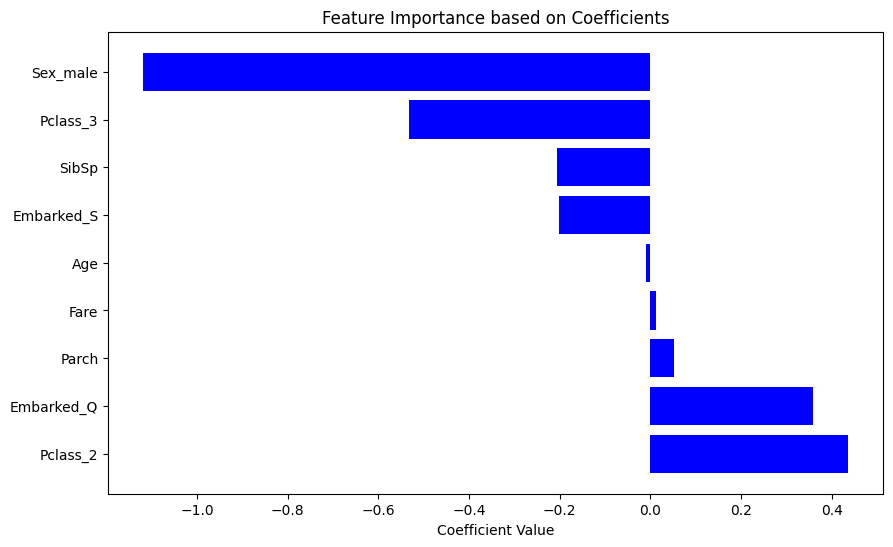

In [332]:
import matplotlib.pyplot as plt

# Extract coefficients from the model
coefficients = model.linear.weight.detach().numpy().flatten()
X = pd.DataFrame(X, columns=data.columns[1:])
features = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)


##### Your code starts here #####

# Print the coefficients
print(coef_df)

# Plot the coefficients with a bar chart
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color='blue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance based on Coefficients")
plt.show()

Does the result align with your intuition? Why or why not? According to your results, what is the biggest contributing factor of survival? (Answer in the markdown cell below)

The results somewhat align with my intuition as I believed that the Pclass would be the biggest indicator of who survives since it depends on the class of the passengers, with people in middle and upper classes being offered more help, such as more access and assistance in getting on lifeboats, although Pclass_1 is not shown on this chart. As shown in the graph above, Pclass was indeed the biggest contributing factor of survival. I did not think that where passengers embarked on would play such a big factor in contributing to survival rate, but it did. Being male also played a big role in indicating survival rate, with men surviving the least since they probably prioritized women and children escaping first.

## Statement of Collaboration

It is mandatory to include a Statement of Collaboration in each submission, with respect to the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website.
For programming assignments, in particular, I encourage the students to organize (perhaps using Ed) to discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start working on it.

However, you should not discuss the specific solutions, and, as a guiding principle, you are not allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard, written notes, referring to Ed, etc.).

Especially after you have started working on the assignment, try to restrict the discussion to Ed as much as possible, so that there is no doubt as to the extent of your collaboration.

I worked on this assignment alone and used all resources available from Canvas to complete this assignment.